In [7]:
from ctapipe.reco import TelescopeReco
from ctapipe.utils.datasets import get_dataset_path
from ctapipe.io import event_source, EventSeeker
import numpy as np
import astropy.units as u
from hipecta.plot import calib_signal
import matplotlib.pyplot as plt
from ctapipe.visualization import CameraDisplay
from ctapipe.instrument import CameraGeometry
from ctapipe.io.containers import HillasParametersContainer
%matplotlib inline

In [16]:
reco = TelescopeReco()
reco.config.waveletThreshold = 3
reco.config.hillasThresholdSignalTel = 100

In [17]:
source = event_source(get_dataset_path("gamma_test.simtel.gz"), max_events=100)
seeker = EventSeeker(source)

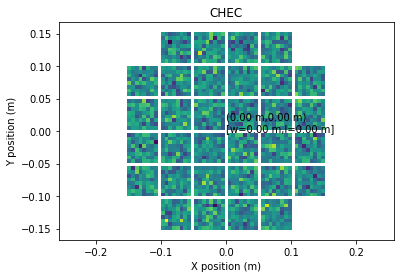

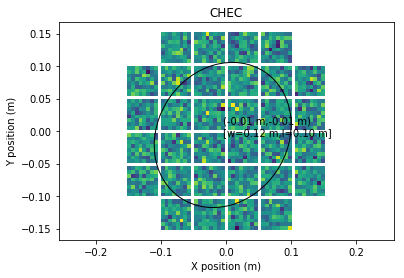

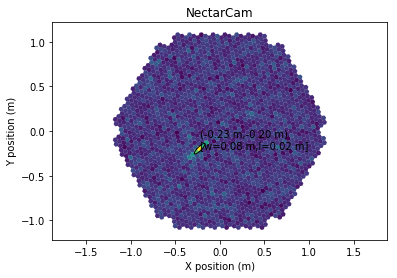

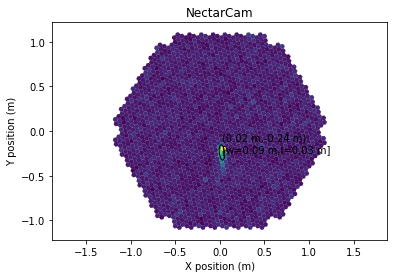

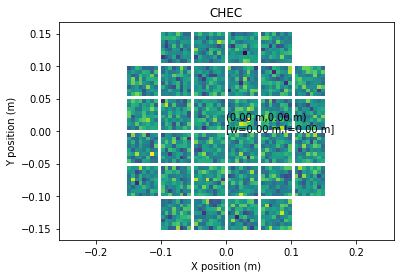

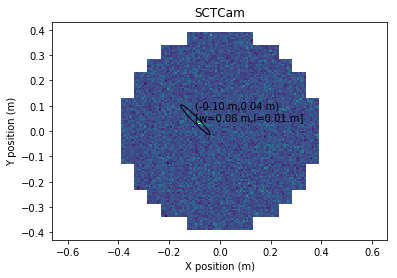

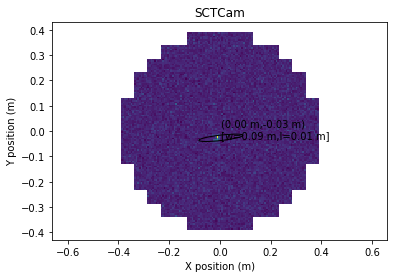

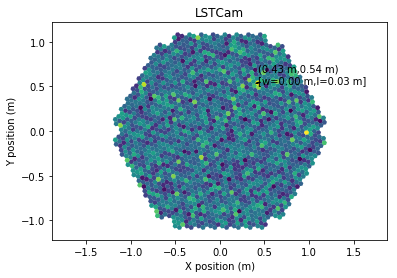

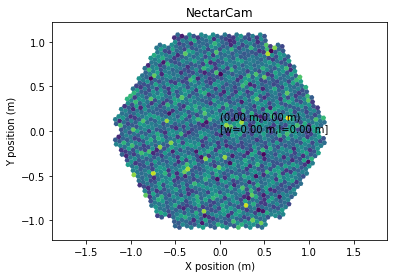

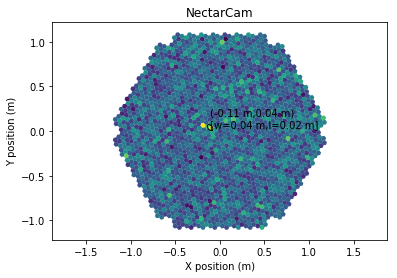

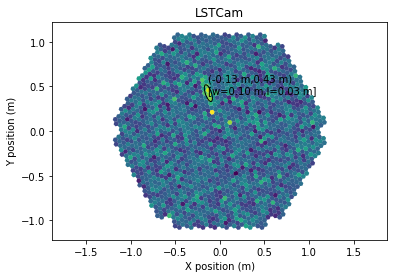

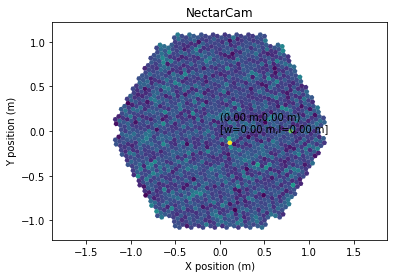

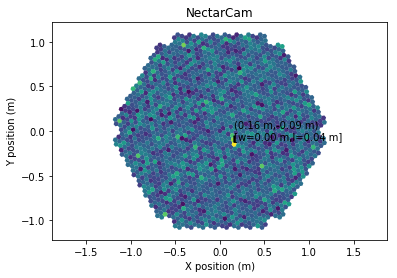

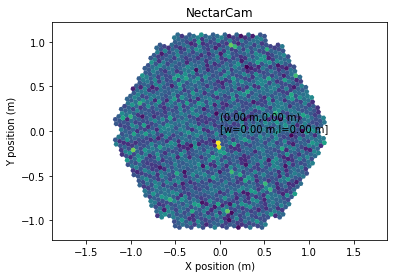

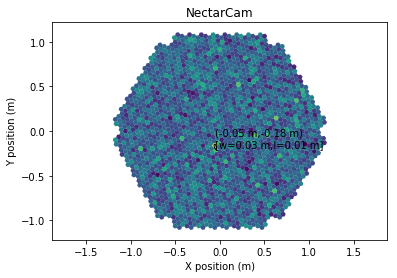

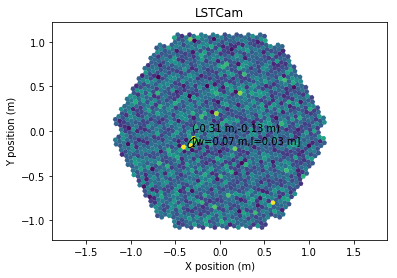

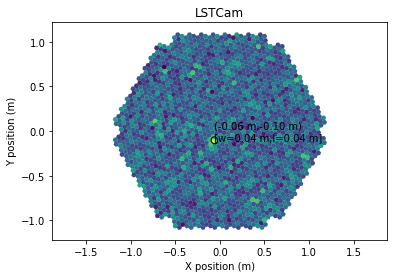

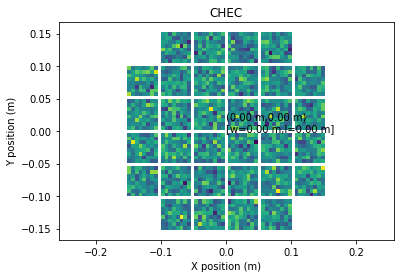

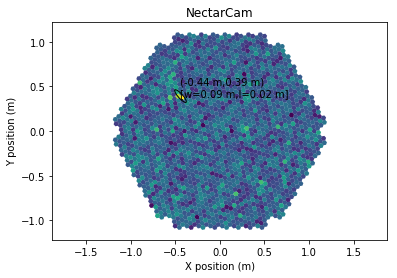

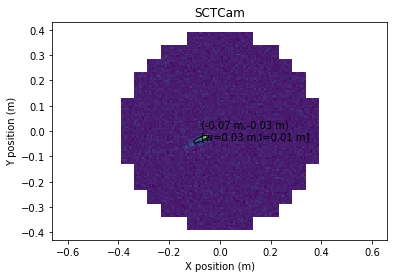

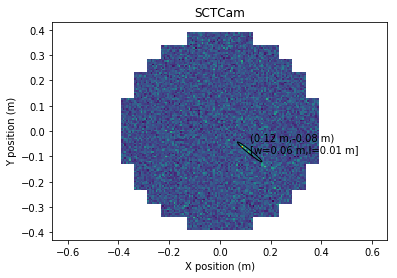

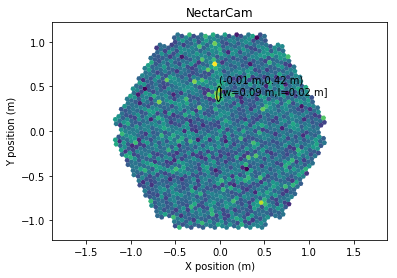

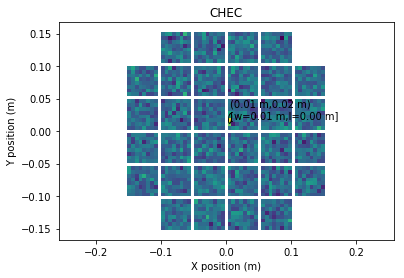

In [18]:

for event in seeker:

    for tel_id in event.r0.tels_with_data:
        tabHillas, reco_status = reco.process(tel_id, event)
        moments = reco.getHillasParametersContainer(tabHillas)    
        
        if  reco_status:
            image = event.r0.tel[tel_id].image[0]
            geom = event.inst.subarray.tels[tel_id].camera
            camera = CameraDisplay(geom, image)#, ax=axes.flatten()[0])
            camera.overlay_moments(moments)
            plt.show()                        

In [5]:
type(event)

ctapipe.io.containers.DataContainer